### Question 1: How using a safety equipment helps us to survive an accident?

We were always told: 'fasten a seat belts', 'wear helmet'. In some countries it's mandatory and not using them can cause a fine. The answer can be find in 'users' dataframe, so let's check it.

First step before any data analysis is to import required libraries and data. Any information required to understand columns is available here: https://www.kaggle.com/ahmedlahlou/accidents-in-france-from-2005-to-2016.

In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

users = pd.read_csv('data/users.csv', encoding='latin1')

Now let's take a look on dataframe.

In [266]:
users.head()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201600000001,1.0,1,1,2,0.0,11.0,0.0,0.0,0.0,1983.0,B02
1,201600000001,1.0,1,3,1,9.0,21.0,0.0,0.0,0.0,2001.0,A01
2,201600000002,1.0,1,3,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
3,201600000002,2.0,2,3,1,0.0,11.0,0.0,0.0,0.0,2000.0,A01
4,201600000002,3.0,2,3,2,0.0,11.0,0.0,0.0,0.0,1962.0,A01


Let's see which columns contain missing values - we are interested here in two columns:
* 'grav' which is a severity of incident 
    * 1 - Unscathed
    * 2 - Killed
    * 3 - Hospitalized wounded
    * 4 - Light injury
* 'secu' which two numbers determine the safety equippment that was available for person first number stands for:
    * 1 - Belt
    * 2 - Helmet
    * 3 - Children's device
    * 4 - Reflective equipment
    * 9 - Other
    
    the second number is the use of Safety Equipment:
    * 1 - Yes
    * 2 - No
    * 3 - Not determinable

In [267]:
# Make a copy of users - in case of future extension of the notebook
users_q1 = users.copy()

In [268]:
users_q1.columns[users.isna().sum() != 0]

Index(['place', 'trajet', 'secu', 'locp', 'actp', 'etatp', 'an_nais'], dtype='object')

So it looks like the 'grav' does not have any missing value, but 'secu' has. What is the percentage of missing values?

In [269]:
nans = users_q1.isna()['secu'].sum() / users.shape[0]
nans

0.02316518346166455

Apparently some of the 'secu' column is polluted in different way - it's value is 0. Let's also check that.

In [270]:
zeros_type = (users_q1[users_q1['secu'] == 0].count() / users.shape[0])['secu']
zeros_type

0.036446597956828475

In [271]:
zeros_existence = (users_q1[users_q1['secu'] == 10].count() / users.shape[0])['secu']
zeros_existence

0.0030015911471451303

In [272]:
nans+zeros_type+zeros_existence

0.06261337256563815

So it looks like only 2% of all users has missing values. And around 6,2% of safety equipment values are zeros. I think we should risk removing that rows, as we can't assume what they are representing.

In [273]:
users_q1 = users_q1.dropna(subset = ['secu'], axis='rows')
# users_q1 = users_q1.drop(users_q1[users_q1['secu'] == 0].index)
# users_q1 = users_q1.drop(users_q1[users_q1['secu'] == 10].index)

In [274]:
users_q1[users_q1['secu'] == 0]

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
1132006,200800000001,0.0,3,3,2,5.0,0.0,1.0,3.0,1.0,1932.0,A01
1132080,200800000034,1.0,1,1,1,4.0,0.0,0.0,0.0,0.0,1978.0,B02
1132083,200800000036,0.0,3,3,1,2.0,0.0,5.0,5.0,3.0,1993.0,A01
1132100,200800000045,0.0,3,3,1,2.0,0.0,2.0,3.0,1.0,1996.0,A01
1132103,200800000047,0.0,3,2,1,9.0,0.0,1.0,3.0,1.0,1950.0,A01
...,...,...,...,...,...,...,...,...,...,...,...,...
1875977,200500087942,0.0,3,3,2,2.0,0.0,5.0,9.0,3.0,1989.0,A01
1875978,200500087942,0.0,3,4,1,2.0,0.0,5.0,9.0,3.0,1993.0,A01
1875980,200500087943,0.0,3,3,1,5.0,0.0,1.0,5.0,1.0,1986.0,A01
1875986,200500087946,0.0,3,3,1,5.0,0.0,5.0,3.0,1.0,1942.0,A01


In [275]:
users_q1[users_q1['secu'] == 10]

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
1132773,200800000310,1.0,1,3,1,9.0,10.0,0.0,0.0,0.0,1966.0,A01
1132774,200800000310,5.0,2,3,2,0.0,10.0,0.0,0.0,0.0,1996.0,A01
1132984,200800000403,1.0,1,3,1,5.0,10.0,0.0,0.0,0.0,1970.0,B02
1132985,200800000403,2.0,2,3,2,0.0,10.0,0.0,0.0,0.0,1964.0,B02
1132986,200800000403,2.0,2,1,2,0.0,10.0,0.0,0.0,0.0,2004.0,B02
...,...,...,...,...,...,...,...,...,...,...,...,...
1874571,200500087197,4.0,2,3,2,0.0,10.0,0.0,0.0,0.0,1990.0,B02
1874573,200500087198,2.0,2,1,2,0.0,10.0,0.0,0.0,0.0,1987.0,A01
1874582,200500087236,1.0,1,1,1,5.0,10.0,0.0,0.0,0.0,1966.0,A01
1874584,200500087237,1.0,1,1,1,0.0,10.0,0.0,0.0,0.0,1979.0,A01


Now let's take 'grav' and 'secu' columns out of dataset to have only them in our vision

In [278]:
equipment_severity = users_q1[['grav', 'secu']].copy()
# Split Secu to two columns - type and if equipment was used
equipment_severity.loc[:, 'equipment_used'] = equipment_severity.loc[:, 'secu'].values % 10

Let's visualize first diagram

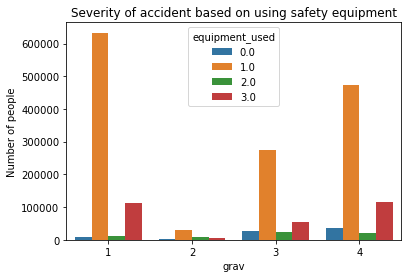

In [287]:
ax = sns.countplot(x = 'grav', hue = 'equipment_used', data=equipment_severity)
ax.set_title('Severity of accident based on using safety equipment')
ax.set_ylabel('Number of people')
plt.show()

The 2 on the grav axis is the information that person died in accident. We can see that in most cases people were using a safety equipment. Let's see now proportion of people who used equipment and people who not used in each 'grav' category.

In [294]:
### How to do it in a clean way?

4.123089088033738